In [75]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn import ensemble
import math
from sklearn import model_selection as ms

In [15]:
data_file = open("bioactivity.txt")
data_file.readline()
def splitter(line):
    spls = line.strip().split("\t")
    try:
        return (spls[0],Chem.MolFromSmiles(spls[10]),float(spls[14]))
    except ValueError:
        return None
mols = [splitter(line) for line in data_file]
mols = [m for m in mols if m]

In [16]:
print(len(mols))

861


In [17]:
print(mols[1:10])


[('CHEMBL479587', <rdkit.Chem.rdchem.Mol object at 0x7fd6bc154490>, 1e-05), ('CHEMBL39', <rdkit.Chem.rdchem.Mol object at 0x7fd6bc1543a0>, 0.0003), ('CHEMBL1276585', <rdkit.Chem.rdchem.Mol object at 0x7fd6bc1542b0>, 0.5012), ('CHEMBL71', <rdkit.Chem.rdchem.Mol object at 0x7fd6bc154210>, 1.0), ('CHEMBL1276647', <rdkit.Chem.rdchem.Mol object at 0x7fd6bc154260>, 1.778), ('CHEMBL3084515', <rdkit.Chem.rdchem.Mol object at 0x7fd6bc154440>, 1.92), ('CHEMBL1276529', <rdkit.Chem.rdchem.Mol object at 0x7fd6bc154620>, 2.884), ('CHEMBL1276615', <rdkit.Chem.rdchem.Mol object at 0x7fd6bc154670>, 3.236), ('CHEMBL1202215', <rdkit.Chem.rdchem.Mol object at 0x7fd6bc1546c0>, 5.0)]


In [31]:
mqns = [rdMolDescriptors.MQNs_(mol[1]) for mol in mols]
vals = [m[2] for m in mols]

In [48]:
clf = svm.SVR()
clf.fit(mqns, vals) 


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [50]:
print(clf.predict(mqns[:1]))
print(vals[:1])

[987.63139754]
[1e-09]


In [51]:
def plot(X, *args, highlights=set()):
    fig = plt.figure()
    #ax = plt.subplot(111)
    for i, point in enumerate(X):
        x,y = point
        if i in highlights:
            plt.plot([x],[y],"r.", markersize=4)
        else:
            plt.plot([x],[y],"k.", markersize=1)
    plt.show()

In [52]:
preds = clf.predict(mqns)

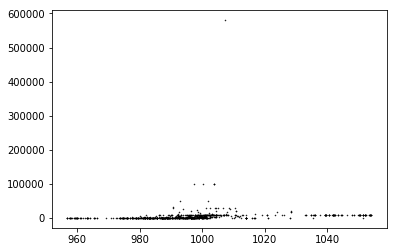

In [54]:
plot(zip(preds, vals))

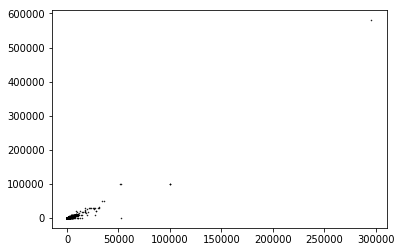

In [64]:
clf2 = ensemble.RandomForestRegressor()
clf2.fit(mqns, vals)
preds2 = clf2.predict(mqns)
plot(zip(preds2,vals))

In [69]:
pvals = [-math.log10(val) for val in vals]

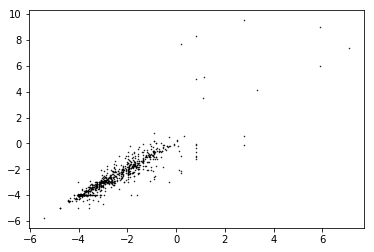

In [71]:
clf3 = ensemble.RandomForestRegressor()
clf3.fit(mqns, pvals)
preds3 = clf3.predict(mqns)
plot(zip(preds3,pvals))

In [ ]:
train_test_split()

In [76]:
trainset, testset = ms.train_test_split(list(zip(mols,mqns,pvals)))
len(trainset), len(testset)

(645, 216)

In [77]:
clf4 = ensemble.RandomForestRegressor()
clf4.fit([mqns for mol,mqns,pval in trainset], [val for m,mqn,val in trainset])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [78]:
preds4 = clf4.predict([mqns for mol,mqns,pval in testset])

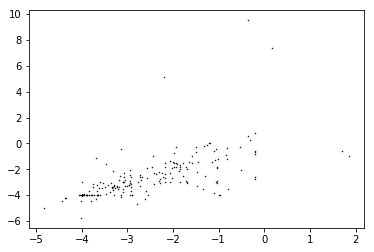

In [80]:
plot(zip(preds4,[pval for m,mqn,pval in testset]))

In [81]:
clf4.score([mqns for mol,mqns,pval in testset],[pval for m,mqn,pval in testset])

0.4323436510408618

In [82]:
clf4.score([mqns for mol,mqns,pval in testset],[pval for m,mqn,pval in testset])**0.5

0.6575284412410324

In [83]:
from rdkit.Chem  import Descriptors

In [84]:
dir(Descriptors)

['BalabanJ',
 'BertzCT',
 'Chem',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'EState_VSA1',
 'EState_VSA10',
 'EState_VSA11',
 'EState_VSA2',
 'EState_VSA3',
 'EState_VSA4',
 'EState_VSA5',
 'EState_VSA6',
 'EState_VSA7',
 'EState_VSA8',
 'EState_VSA9',
 'ExactMolWt',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'FractionCSP3',
 'HallKierAlpha',
 'HeavyAtomCount',
 'HeavyAtomMolWt',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'MaxAbsEStateIndex',
 'MaxAbsPartialCharge',
 'MaxEStateIndex',
 'MaxPartialCharge',
 'MinAbsEStateIndex',
 'MinAbsPartialCharge',
 'MinEStateIndex',
 'MinPartialCharge',
 'MolLogP',
 'MolMR',
 'MolWt',
 'NHOHCount',
 'NOCount',
 'NumAliphaticCarbocycles',
 'NumAliphaticHeterocycles',
 'NumAliphaticRings',
 'NumAromaticCarbocycles',
 'NumAromaticHeterocycles',
 'NumAromaticRings',
 'NumHAcceptors',
 'NumHDonors',
 'NumHeteroatoms',
 'NumRadicalElectrons',
 'N